## Dataset

We will be working with a subset of the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database). Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. You will be using this dataset for the rest of the assignment. Do not edit this cell.

In [ ]:
##### DATASET GENERATION #####
import numpy as np
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train[y_train == 2][: 100].reshape(-1, 28 * 28)
test_image = X_test[y_test == 2][0].reshape(28 * 28)
##### DO NOT EDIT THIS CELL #####

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## Problem-1

How many samples does the dataset have?

In [ ]:
# Enter your solution here
X.shape

(100, 784)

## Problem-2

How many features does the dataset have?

In [ ]:
# Enter your solution here
test_image


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 116, 125, 171, 255, 255, 150,  93,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 169, 253, 253, 253, 253, 253, 253, 218,  30,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0, 169, 253, 253, 253, 213, 142, 176, 253,
       253, 122,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  52, 250, 253, 210,  32,  1

## Problem-3

Each sample corresponds to an image of dimension $28 \times 28$. Visualize one of these images using the `matplotlib` library.

- You need to know how to reshape a feature vector. Refer to week-0 content for the same.
- You can refer to the following [document](https://matplotlib.org/stable/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py) for plotting NumPy arrays as images using `matplotlib`.

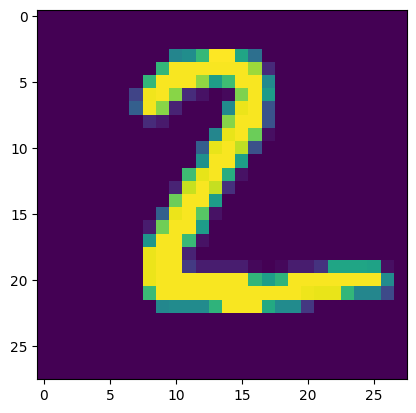

In [ ]:
# Enter your solution here
import matplotlib.pyplot as plt
plt.imshow(test_image.reshape(28,28))

## Problem-4

Center the the dataset $\mathbf{X}$ around its mean. Call this centered dataset $\mathbf{X}^{\prime}$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n \cdot d} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{d} (X_{ij}^{\prime})^2}
$$

In [ ]:
# Enter your solution here
mean_X=np.mean(X,axis=0)
centered_X=X-mean_X
n,d=X.shape
sum_of_squares=np.sum(centered_X**2)
ans=np.sqrt(sum_of_squares)/(n*d)
print(round(ans,2))

0.23


## Problem-5

Compute the covariance matrix $\mathbf{C}$ of the centered dataset.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{d^2} \sqrt{\sum \limits_{i = 1}^{d} \sum \limits_{j = 1}^{d} C_{ij}^2}
$$

In [ ]:
# Enter your solution here
C=np.cov(centered_X.T)
sum_C=np.sum(C**2)
ans=np.sqrt(sum_C)/d**2
print(round(ans,2))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
1.38


## Problem-6

Compute the first and second principal components of the dataset, $\mathbf{w}_1$ and $\mathbf{w}_2$.

<u>Conversion</u>

Compute:
$$
\mathbf{w} = \mathbf{w}_1 + \mathbf{w}_2
$$

Enter the following quantity as your answer correct to two decimal places:

$$
\left| \sum \limits_{i = 1}^{d} w_i \right|
$$

In [ ]:
# Enter your solution here
evals,evecs=np.linalg.eig(C)
evals_i=np.argsort(evals)
evals_i=evals_i[::-1]
evals=evals[evals_i]
w1=evecs[:,evals_i[0]]
w2=evecs[:,evals_i[1]]
w=w1+w2
print(round(np.sum(w),2))


(1.05+0j)


<ipython-input-36-ec97293f8173>:9: DeprecationWarning: The Python built-in `round` is deprecated for complex scalars, and will raise a `TypeError` in a future release. Use `np.round` or `scalar.round` instead.
  print(round(np.sum(w),2))


## Problem-7

Visualize the first principal component as an image.

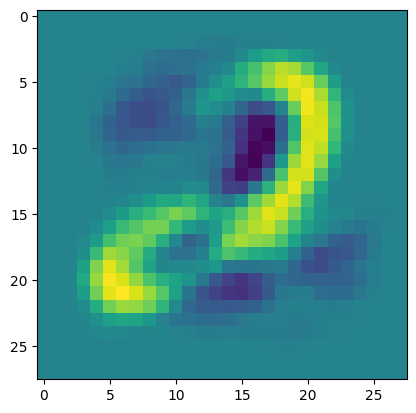

In [ ]:
# Enter your solution here
w1.real.shape
plt.imshow(w1.real.reshape(28,28))

## Problem-8

Find the smallest value of $k$ for which the first $k$ principal components capture at least $95\%$ of the variance in the data.

In [ ]:
# Enter your solution here
for i in range(d):
  if np.sum(evals[0:i+1])/np.sum(evals)>=0.95:
    print(i+1)
    break

53


## Problem-9

Given a `test_image`, visualize the proxies  by reconstructing it using the top $k$ principal components. Consider four values of $k$; values of $k$ for which the top-$k$ principal components explain:

- 20% of the variance
- 50% of the variance
- 80% of the variance
- 95% of the variance



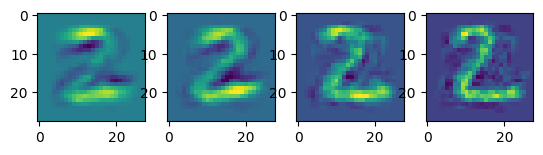

In [ ]:
# Enter your solution here
def reconstruct(C,test_img,thresh):
  eval,evec=np.linalg.eigh(C)
  eval=list(reversed(sorted(eval)))
  d=test_img.size
  k=0
  for i in range(d):
    if np.sum(evals[0:i+1])/np.sum(evals)>=thresh:
      k=i+1
      break
  W=evec[:,-k:]
  coeff=test_image.T@W
  reconstructed_image=W@coeff

  return reconstructed_image

reconstructed_image=reconstruct(C,test_image,0.2)
plt.subplot(1,4,1)
plt.imshow(reconstructed_image.reshape(28,28))
reconstructed_image=reconstruct(C,test_image,0.5)
plt.subplot(1,4,2)
plt.imshow(reconstructed_image.reshape(28,28))
reconstructed_image=reconstruct(C,test_image,0.8)
plt.subplot(1,4,3)
plt.imshow(reconstructed_image.reshape(28,28))
reconstructed_image=reconstruct(C,test_image,0.95)
plt.subplot(1,4,4)
plt.imshow(reconstructed_image.reshape(28,28))